In [1]:
from google.colab import drive
drive.mount('drive')
import numpy as np
import pandas as pd


Mounted at drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/CL/Day_5_6/student_scores.csv')

In [3]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39


In [10]:
X = df[['MathScore','ReadingScore','WritingScore']]

In [11]:
X

,MathScore,ReadingScore,WritingScore
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
30636,56,47,51
30637,74,75,72
30638,36,29,27
30639,43,34,39


In [17]:
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=42)
X_Reduced = pca.fit_transform(X)

df_reduced =  pd.DataFrame(X_Reduced,columns=['PC1','PC2'])
df_reduced

,PC1,PC2
0,-7.610299,1.086959
1,-24.598122,-13.911027
2,-42.240834,-0.511904
3,32.926076,-1.177292
4,-13.893472,1.814813
...,...,...
30636,29.430020,6.792657
30637,-9.260538,2.537699
30638,65.299454,7.125229
30639,51.343017,5.908344


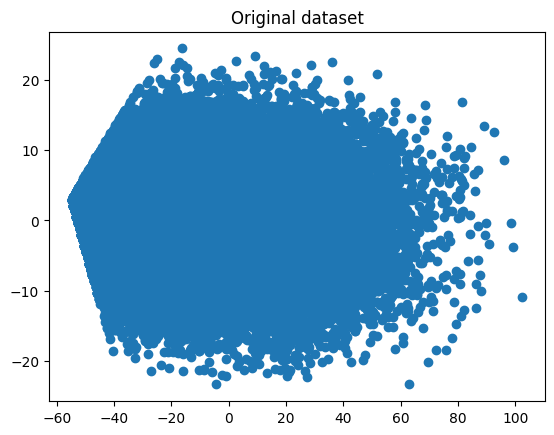

In [22]:

import matplotlib.pyplot as plt
data = np.array(df_reduced)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Original dataset")
plt.show()


In [32]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.025, random_state=42)
preds = isolation_forest.fit_predict(data)

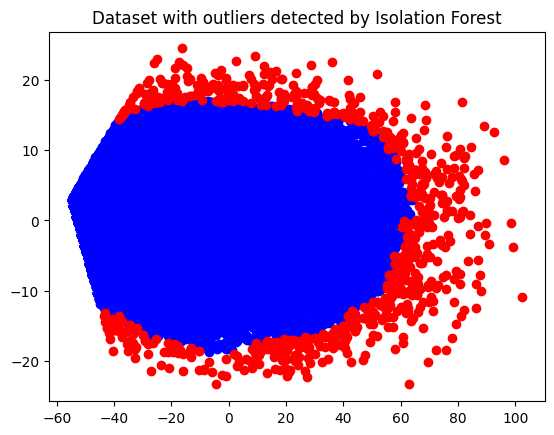

In [33]:

blobs_df = pd.DataFrame(data, columns=["x_1", "x_2"])
blobs_df["is_anomaly"] = preds

normal_points_df = blobs_df[blobs_df["is_anomaly"] == 1]
anomaly_points_df = blobs_df[blobs_df["is_anomaly"] == -1]

plt.scatter(normal_points_df["x_1"], normal_points_df["x_2"], color="blue")
plt.scatter(anomaly_points_df["x_1"], anomaly_points_df["x_2"], color="red")
plt.title("Dataset with outliers detected by Isolation Forest")
plt.show()

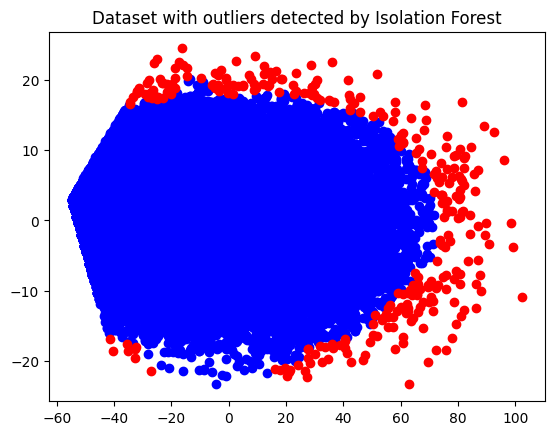

In [34]:
isolation_forest = IsolationForest(n_estimators=150, contamination=0.01, random_state=42)
preds = isolation_forest.fit_predict(data)
blobs_df = pd.DataFrame(data, columns=["x_1", "x_2"])
blobs_df["is_anomaly"] = preds

normal_points_df = blobs_df[blobs_df["is_anomaly"] == 1]
anomaly_points_df = blobs_df[blobs_df["is_anomaly"] == -1]

plt.scatter(normal_points_df["x_1"], normal_points_df["x_2"], color="blue")
plt.scatter(anomaly_points_df["x_1"], anomaly_points_df["x_2"], color="red")
plt.title("Dataset with outliers detected by Isolation Forest")
plt.show()